In [1]:
from helper_fns import *

In [23]:
import os,sys
from IPython.display import Image

In [30]:
dataset = 'simulated'
# threshold_type = 'absolute'
threshold_type = 'absolute'

In [31]:
# muh_fun_range = ['linear_regression','support_vector','knn', 'random_forest','polynomial_regression']
# models = ['Linear Regression','SVR','KNN', 'Random Forest', 'Polynomial Regression']
# sim_data_size_range = [100, 200, 400, 600, 800, 1000]
# #cp_types = ['Jacknife+', 'Wt_Jacknife+', 'CV+', 'Wt_CV+', 'Split',  'Wt_Split']
# cp_types = ['Jacknife+', 'CV+','Split']
# bias_range = [0, 100, 150, 200]
# tau = 10


muh_fun_range = ['linear_regression']
models = ['Linear Regression']
# sim_data_size_range = [1000]
sim_data_size_range = [500]

# cp_types = ['Jacknife+', 'Wt_Jacknife+', 'CV+', 'Wt_CV+', 'Split',  'Wt_Split']
# cp_types = ['Jacknife+', 'CV+','Split']
cp_types = ['Jacknife+', 'Split']

bias_range = [0, 100, 150, 200]
tau = 10

In [26]:
# bias = bias_range[0]
# sim_data_size = sim_data_size_range[-1]
muh_fun = muh_fun_range[0]
print(muh_fun)
# model = models[0]

linear_regression


In [27]:
sim_data_size_range

[500]

In [32]:
cmap = ['#c3e2e3', '#7399b8','#424673', '#33a02c']
cmap_paired = [ '#c3e2e3', '#95c0ce', '#7399b8', '#59709c', '#424673', '#27213f']

    sim_data_size     Legend     value
0             500  Jacknife+  1.000000
1             500  Jacknife+  0.445337
2             500  Jacknife+  1.000000
3             500  Jacknife+  1.000000
4             500  Jacknife+  1.000000
5             500  Jacknife+  0.423685
6             500  Jacknife+  0.409212
7             500  Jacknife+  0.470199
8             500  Jacknife+  0.508870
9             500  Jacknife+  0.446895
10            500      Split  0.119318
11            500      Split  1.000000
12            500      Split  0.090909
13            500      Split  1.000000
14            500      Split  0.119318
15            500      Split  0.153409
16            500      Split  0.170455
17            500      Split  0.107955
18            500      Split  0.176136
19            500      Split  0.119318


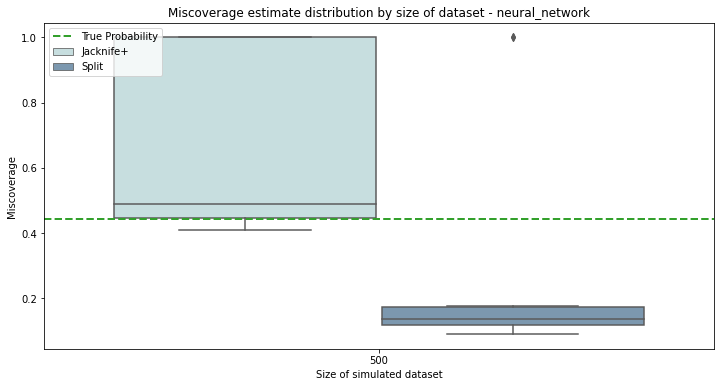

In [33]:
# model = ['linear_regression']
# model_names = ['Linear Regression']
model = ['neural_network']
model_names = ['Neural Network']
# model = ['random_forest']
# model_names = ['Random Forest']

trial_time = 10
i = 0  # i is for model
sim_data_size = sim_data_size_range[0]



mean_coverage_by_dataset_size = []
true_prob = []
mean_coverage_by_dataset_size.append(pd.read_csv(dataset + '/bias_0/sim_data_size_' + str(sim_data_size) +\
                        '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                        '/JAWS_coverage_by_trial/mean_coverage.csv'))

# print(mean_coverage_by_dataset_size)


mean_coverage_by_dataset_size[i]['model'] = np.repeat(model_names[i], trial_time)

# print(mean_coverage_by_dataset_size[0])
mean_coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size_range[i], trial_time)

true_prob.append(pd.read_csv(dataset + '/bias_0/sim_data_size_' + str(sim_data_size) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])
# print(true_prob)

mean_coverage_by_dataset_size_transform = pd.melt(pd.concat([mean_coverage_by_dataset_size[0]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')

mean_coverage_by_dataset_size_transform['value'] = 1 - mean_coverage_by_dataset_size_transform['value']
print(mean_coverage_by_dataset_size_transform)

true_prob_mean = np.mean(true_prob, axis = 1)
true_prob_mean = 1 - true_prob_mean
        
plt.figure(figsize = (12,6))


# plt.axhline(y = true_prob_mean[i],  
#             xmin = 0.15*(1.15*i), xmax = 0.15*(1.15*i+1), 
#             color = '#33a02c',
#             lw = 2,
#             linestyle = '--', 
#             label = 'True Probability' if i == 0 else "") 

plt.axhline(y = 1- np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
sns.boxplot(x = 'sim_data_size',
    y = 'value',
    data = mean_coverage_by_dataset_size_transform,
    palette = cmap,
    hue = 'Legend')

plt.legend(loc = 'upper left')
#plt.ylim((0.75,0.975))
plt.ylabel('Miscoverage')
plt.xlabel('Size of simulated dataset')
plt.title('Miscoverage estimate distribution by size of dataset - ' + model[0])
plt.savefig(dataset + '/bias_0/sim_data_size_' + str(sim_data_size_range[0]) + '/Threshold_type_' + str(threshold_type) + '/' + \
                        model[0] + '/plots/coverage_estimates_by_size_' + dataset +'.png')

In [ ]:
simulated/bias_0/sim_data_size_100/Threshold_type_absolute/neural_network/JAWS_coverage_by_trial/mean_coverage.csv 
simulated/bias_0/sim_data_size_100/Threshold_type_absolute/nerual_network/JAWS_coverage_by_trial/mean_coverage.csv

    sim_data_size     Legend     value
0            1000  Jacknife+  0.707423
1            1000  Jacknife+  0.709372
2            1000  Jacknife+  0.711051
3            1000  Jacknife+  0.710399
4            1000  Jacknife+  0.705074
5            1000  Jacknife+  0.701983
6            1000  Jacknife+  0.723918
7            1000  Jacknife+  0.726125
8            1000  Jacknife+  0.719196
9            1000  Jacknife+  0.718897
10           1000        CV+  0.701693
11           1000        CV+  0.711298
12           1000        CV+  0.713714
13           1000        CV+  0.709933
14           1000        CV+  0.705687
15           1000        CV+  0.702853
16           1000        CV+  0.721146
17           1000        CV+  0.724960
18           1000        CV+  0.720528
19           1000        CV+  0.725354
20           1000      Split  0.655271
21           1000      Split  0.712251
22           1000      Split  0.712251
23           1000      Split  0.726496
24           1000      Sp

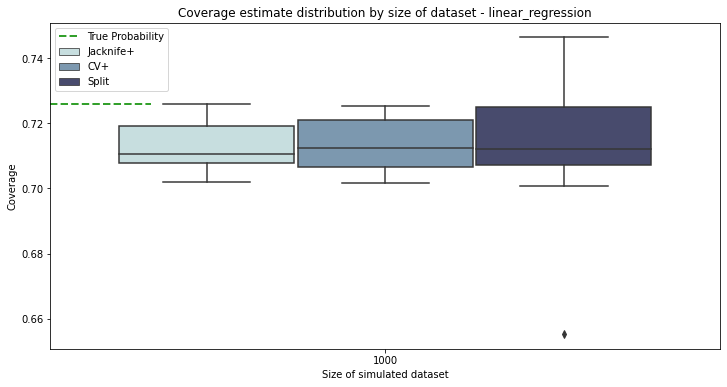

In [ ]:

# model = ['linear_regression']
# model_names = ['Linear Regression']

# trial_time = 10
# i = 0  # i is for model
# sim_data_size = sim_data_size_range[0]



# mean_coverage_by_dataset_size = []
# true_prob = []
# mean_coverage_by_dataset_size.append(pd.read_csv(dataset + '/bias_0/sim_data_size_' + str(sim_data_size) +\
#                         '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
#                         '/JAWS_coverage_by_trial/mean_coverage.csv'))

# # print(mean_coverage_by_dataset_size)


# mean_coverage_by_dataset_size[i]['model'] = np.repeat(model_names[i], trial_time)

# # print(mean_coverage_by_dataset_size[0])
# mean_coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size_range[i], trial_time)

# true_prob.append(pd.read_csv(dataset + '/bias_0/sim_data_size_' + str(sim_data_size) +\
#                             '/Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
#                             '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])
# # print(true_prob)

# mean_coverage_by_dataset_size_transform = pd.melt(pd.concat([mean_coverage_by_dataset_size[0]]),
#                                               id_vars = ['sim_data_size'],
#                                               value_vars = cp_types, 
#                                               var_name = 'Legend')

# print(mean_coverage_by_dataset_size_transform)

# true_prob_mean = np.mean(true_prob, axis = 1)
        
# plt.figure(figsize = (12,6))


# plt.axhline(y = true_prob_mean[i],  
#             xmin = 0.15*(1.15*i), xmax = 0.15*(1.15*i+1), 
#             color = '#33a02c',
#             lw = 2,
#             linestyle = '--', 
#             label = 'True Probability' if i == 0 else "") 

# #plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
# sns.boxplot(x = 'sim_data_size',
#     y = 'value',
#     data = mean_coverage_by_dataset_size_transform,
#     palette = cmap,
#     hue = 'Legend')

# plt.legend(loc = 'upper left')
# #plt.ylim((0.75,0.975))
# plt.ylabel('Coverage')
# plt.xlabel('Size of simulated dataset')
# plt.title('Coverage estimate distribution by size of dataset - ' + model[0])
# plt.savefig(dataset + '/bias_0/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
#                         model[0] + '/plots/coverage_estimates_by_size_' + dataset +'.png')
    

In [ ]:
# model = 'linear_regression'
# sim_data_size = sim_data_size_range
# coverage_by_dataset_size = []
# i = 0

# coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
#                                 '/Threshold_type_' + str(threshold_type) + '/' + model + \
#                                 '/JAWS_coverage_by_trial/mean_coverage.csv').rename(columns = \
#                 {'Jacknife+':'InvCP-Jacknife+','CV+':'InvCP-CV+', 'Split':'InvCP-Split'}))
# print(coverage_by_dataset_size)
# coverage_by_dataset_size[i]['JAWS-Jacknife+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
#                                     '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
#                                     '/JAWS_coverage_by_trial/jackknife_plus.csv').iloc[:,1]
# print(coverage_by_dataset_size)
# coverage_by_dataset_size[i]['JAWS-CV+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
#                                     '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
#                                     '/JAWS_coverage_by_trial/cv_plus.csv').iloc[:,1]
# coverage_by_dataset_size[i]['JAWS-Split'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
#                                     '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
#                                     '/JAWS_coverage_by_trial/split.csv').iloc[:,1]
# print(coverage_by_dataset_size)
# coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size, 1)
# print(coverage_by_dataset_size)

In [ ]:
def coverage_by_type(cp_types, sim_data_size, threshold_type, model):
    
    dataset = 'simulated'

    coverage_by_dataset_size = []

    for i in range(len(sim_data_size)):
        # put the original
        coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                '/Threshold_type_' + str(threshold_type) + '/' + model + \
                                '/JAWS_coverage_by_trial/mean_coverage.csv').rename(columns = \
                {'Jacknife+':'InvCP-Jacknife+','CV+':'InvCP-CV+', 'Split':'InvCP-Split'}))
        
        coverage_by_dataset_size[i]['JAWS-Jacknife+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
                                    '/JAWS_coverage_by_trial/jackknife_plus.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-CV+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
                                    '/JAWS_coverage_by_trial/cv_plus.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-Split'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + model + \
                                    '/JAWS_coverage_by_trial/split.csv').iloc[:,1]

        
        # coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 100)
        coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 1)



        
    coverage_by_dataset_size_transform = pd.melt(pd.concat([coverage_by_dataset_size[0], 
                                                            coverage_by_dataset_size[1], 
                                                            coverage_by_dataset_size[2], 
                                                            coverage_by_dataset_size[3], 
                                                            coverage_by_dataset_size[4],
                                                            coverage_by_dataset_size[5]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')

    
    true_prob = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[-1]) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + model + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability']
    
    
    plt.figure(figsize = (12,6))
    plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
    sns.boxplot(x = 'sim_data_size',
        y = 'value',
        data = coverage_by_dataset_size_transform,
        palette = cmap_paired,
        hue = 'Legend')
    
    plt.legend()
    plt.ylabel('Coverage')
    plt.xlabel('Size of simulated dataset')
    plt.title('Coverage estimate distribution by estimate type - ' + model)
    plt.savefig(dataset + '/No_bias/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
                            model + '/plots/coverage_estimates_by_type_' + dataset +'.png')

In [ ]:
# coverage_by_type(['JAWS-Jacknife+','InvCP-Jacknife+', 'JAWS-CV+', 'InvCP-CV+', 'JAWS-Split', 'InvCP-Split'], sim_data_size_range, threshold_type, muh_fun)

In [ ]:
# coverage_by_type(['JAWS-Jacknife+','InvCP-Jacknife+', 'JAWS-CV+', 'InvCP-CV+', 'JAWS-Split', 'InvCP-Split'], sim_data_size_range, threshold_type, muh_fun)

In [ ]:
# coverage_by_type(['Jacknife+', 'CV+','Split'], sim_data_size_range, threshold_type, muh_fun)

0    0.707561
Name: JAWS-Jacknife+, dtype: float64
0    0.700428
Name: JAWS-CV+, dtype: float64
0    0.700855
Name: JAWS-Split, dtype: float64


ValueError: Length of values (100) does not match length of index (1)

In [ ]:
# simulated/No_bias/sim_data_size_1000/Threshold_type_absolute/linear_regression/JAWS_coverage_by_trial/jackknife_plus.csv
# simulated/No_bias/sim_data_size_1000/Threshold_type_absolute/linear_regression/JAWS_coverage_by_trial/jacknife_plus.csv